In [514]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [515]:
## Read the dataset using pandas
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [516]:
## Devide the dataset into input and target, X contains input and Y contains target data
X = data.drop(['Outcome'],axis =1)
Y = data['Outcome']

In [517]:
## Input data scalling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [518]:
## Dimensionality reduction to 2d using Principle component analysis 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.26179749 0.21640127]
[40.10590727 36.4632608 ]


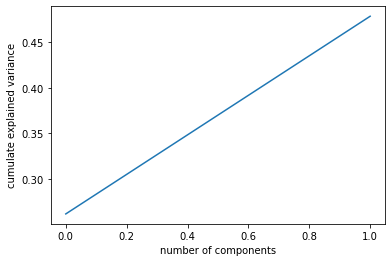

In [519]:
# Plot of Cumulative explained variance Vs number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulate explained variance')
plt.show()

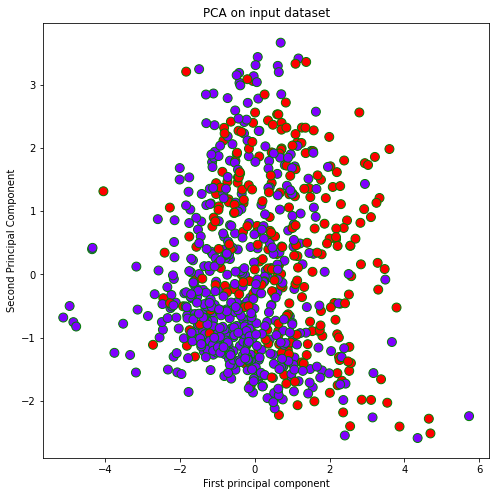

In [520]:
## Plotting the reduced dimensional input data of the train split in a 2d plane
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y,cmap='rainbow',edgecolors='g',s = 80)
plt.title('PCA on input dataset')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

In [522]:
## Train, test, and validation split with ratio 70:20:10
X_train, X_rem, y_train, y_rem = train_test_split(X_pca,Y,train_size = 0.70, random_state = 42)
# split the training data into test and validation set
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.33,random_state = 42)
print(y_train.value_counts(),y_valid.value_counts(),y_test.value_counts())

0    349
1    188
Name: Outcome, dtype: int64 0    99
1    55
Name: Outcome, dtype: int64 0    52
1    25
Name: Outcome, dtype: int64


Text(0, 0.5, 'Second Principal Component')

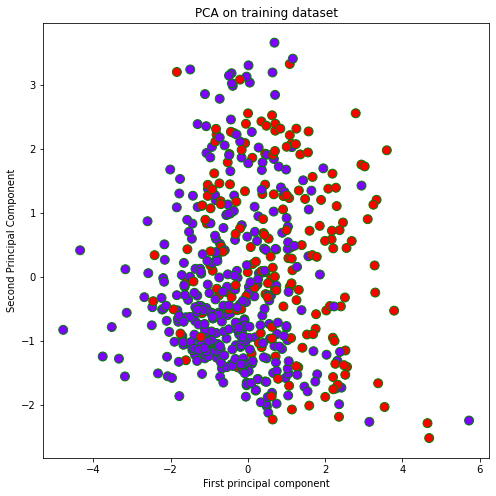

In [523]:
## Plotting the reduced dimensional training data of the train split in a 2d plane
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',edgecolors = 'g',s= 80)
plt.title('PCA on training dataset')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [524]:
## Train the SVM classifier on the reduced dimensional data generated after PCA
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k,gamma= 'auto',C = 0.1)
    model.fit(X_train, y_train)
    y_pred_v = model.predict(X_valid)
    print("Validation Accuracy with kernel", k)
    print(accuracy_score(y_valid, y_pred_v)) 
    y_pred = model.predict(X_test)
    print("Test Accuracy with kernel", k)
    print(accuracy_score(y_test, y_pred))  
    print("Classification Report with kernel", k)
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------")

Validation Accuracy with kernel linear
0.7012987012987013
Test Accuracy with kernel linear
0.7012987012987013
Classification Report with kernel linear
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        52
           1       0.55      0.48      0.51        25

    accuracy                           0.70        77
   macro avg       0.65      0.64      0.65        77
weighted avg       0.69      0.70      0.70        77

-------------------------------------------------
Validation Accuracy with kernel poly
0.6753246753246753
Test Accuracy with kernel poly
0.7012987012987013
Classification Report with kernel poly
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        52
           1       0.67      0.16      0.26        25

    accuracy                           0.70        77
   macro avg       0.69      0.56      0.54        77
weighted avg       0.69      0.70      0.63        77



In [525]:
## Train the Support Vector Machine with Hyper-parameter Tuning
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf','linear','poly','sigmoid']}

grid_search = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [526]:
# print best parameter after tuning
print(grid_search.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [527]:
# print classification report after hyper-parameter tuning
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    grid_search = svm.SVC(kernel=k)
    grid_search.fit(X_train, y_train)
    grid_predictions = grid_search.predict(X_test) 
    print("Classification Report with kernel",k,"after hyper-parameter tuning")
    print(classification_report(y_test, grid_predictions))
    print("------------------------------------------------------")

Classification Report with kernel linear after hyper-parameter tuning
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        52
           1       0.55      0.48      0.51        25

    accuracy                           0.70        77
   macro avg       0.65      0.64      0.65        77
weighted avg       0.69      0.70      0.70        77

------------------------------------------------------
Classification Report with kernel poly after hyper-parameter tuning
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        52
           1       0.67      0.16      0.26        25

    accuracy                           0.70        77
   macro avg       0.69      0.56      0.54        77
weighted avg       0.69      0.70      0.63        77

------------------------------------------------------
Classification Report with kernel rbf after hyper-parameter tuning
              precision    reca

In [536]:
## Reducing the feature dimension of the above data into a one
## dimensional feature space using Linear Discriminant Analysis (LDA)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X,Y)

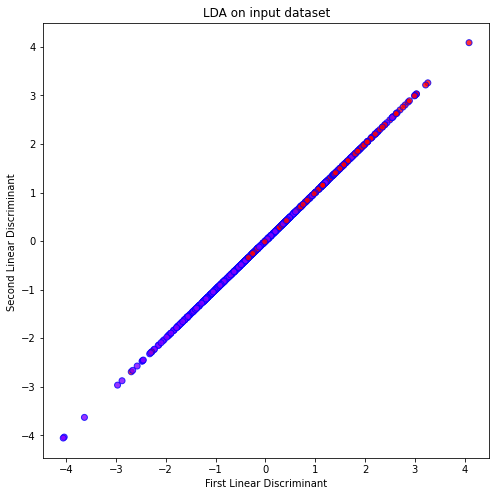

In [537]:
## Plotting the reduced dimensional input data of the train split in a 2d plane
plt.figure(figsize=(8,8))
plt.scatter(X_lda[:,0],X_lda[:,-1],c=Y,cmap='rainbow',alpha = 0.8,edgecolors='b')
plt.title("LDA on input dataset")
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant ')
plt.show()

In [538]:
## Train, test, and validation split with ratio 70:20:10
X_train_lda, X_rem_lda, y_train_lda, y_rem_lda = train_test_split(X_lda, Y, train_size = 0.70, random_state = 42)
# split the training data into test and validation set
X_valid_lda, X_test_lda, y_valid_lda, y_test_lda = train_test_split(X_rem_lda, y_rem_lda, test_size=0.33,random_state = 42 )
print(X_train_lda.shape,X_valid_lda.shape,X_test_lda.shape)

(537, 1) (154, 1) (77, 1)


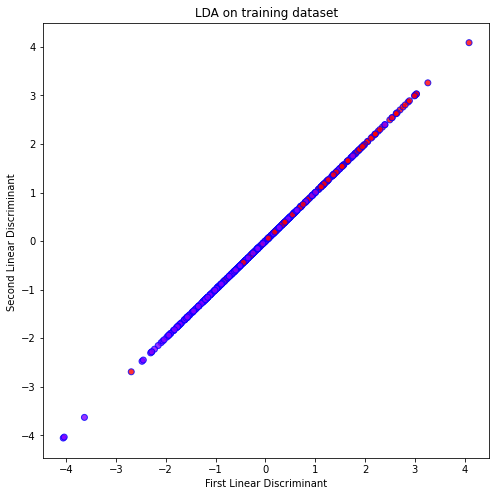

In [539]:
## Plotting the reduced dimensional training data of the train split in a 2d plane
plt.figure(figsize=(8,8))
plt.scatter(X_train_lda[:,0],X_train_lda[:,-1],c=y_train_lda,cmap='rainbow',alpha = 0.8,edgecolors='b')
plt.title("LDA on training dataset")
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant ')
plt.show()

In [540]:
## Train the SVM classifier on the reduced dimensional data generated after LDA
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k,gamma='scale',C = 100)
    model.fit(X_train_lda, y_train_lda)
    y_pred_lda = model.predict(X_valid_lda)
    print("Validation Accuracy with kernel",k)
    print(accuracy_score(y_valid_lda, y_pred_lda))
    y_pred_test_lda = model.predict(X_test_lda)
    print("Test Accuracy with kernel",k)
    print(accuracy_score(y_test_lda, y_pred_test_lda))
    print("Classification Report with kernel", k)
    print(classification_report(y_test_lda,y_pred_test_lda))
    print("------------------------------------------------")

Validation Accuracy with kernel linear
0.7922077922077922
Test Accuracy with kernel linear
0.7662337662337663
Classification Report with kernel linear
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        52
           1       0.64      0.64      0.64        25

    accuracy                           0.77        77
   macro avg       0.73      0.73      0.73        77
weighted avg       0.77      0.77      0.77        77

------------------------------------------------
Validation Accuracy with kernel poly
0.7597402597402597
Test Accuracy with kernel poly
0.7272727272727273
Classification Report with kernel poly
              precision    recall  f1-score   support

           0       0.72      0.96      0.83        52
           1       0.75      0.24      0.36        25

    accuracy                           0.73        77
   macro avg       0.74      0.60      0.60        77
weighted avg       0.73      0.73      0.68        77

-

In [533]:
# Train the Support Vector Machine with Hyper-parameter Tuning
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']}
 
grid_search_lda = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search
grid_search_lda.fit(X_train_lda, y_train_lda)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [534]:
# print best parameter after tuning
print(grid_search_lda.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search_lda.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [535]:
# print classification report after hyper-parameter tuning
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    grid_search_lda = svm.SVC(kernel=k)
    grid_search_lda.fit(X_train_lda, y_train_lda)
    grid_predictions_lda = grid_search_lda.predict(X_test_lda) 
    print("Classification Report with kernel",k,"after hyper-parameter tuning")
    print(classification_report(y_test_lda, grid_predictions_lda))
    print("------------------------------------------------------")

Classification Report with kernel linear after hyper-parameter tuning
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        52
           1       0.64      0.64      0.64        25

    accuracy                           0.77        77
   macro avg       0.73      0.73      0.73        77
weighted avg       0.77      0.77      0.77        77

------------------------------------------------------
Classification Report with kernel poly after hyper-parameter tuning
              precision    recall  f1-score   support

           0       0.72      0.96      0.83        52
           1       0.75      0.24      0.36        25

    accuracy                           0.73        77
   macro avg       0.74      0.60      0.60        77
weighted avg       0.73      0.73      0.68        77

------------------------------------------------------
Classification Report with kernel rbf after hyper-parameter tuning
              precision    reca

In [ ]:
############################### THE END ########################################